# A Study on Gender Distribution Among College Majors & the Effect of Majors on Earnings, Employment Status and Unemployment

In this project we will explore gender representation among college majors, as well as the relationship between selected majors and earnings potential, employment status and unemployment rates for graduates. The dataset used in this analysis was originally collected by the [United States Census Bureau](https://www.census.gov/en.html) through [American Community Survey](https://www.census.gov/programs-surveys/acs/about.html) and contains information on employment status, salary, etc. of students who graduated between 2010 and 2012. The dataset was further cleaned by [FiveThirtyEight](https://fivethirtyeight.com/) and released on their [GitHub repo](https://github.com/fivethirtyeight/data/tree/master/college-majors), which is the version we use in this project.

The dataset contains information on rank by median earnings, college major, category of major, total number of students, sample size, gender, employment numbers, etc. Utilizing the dataset, we will explore the correlation between college majors and potential earnings, as well as the gender distribution and student population distribution among majors.

Let's start by reading the file and exploring its content.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

grads = pd.read_csv('recent-grads.csv')

grads.info()
grads.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [2]:
grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [3]:
grads.describe(include='all')

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,173,172.000000,172.000000,172.000000,173,172.000000,173.000000,173.000000,...,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
unique,NaN,NaN,173,NaN,NaN,NaN,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,GENERAL SOCIAL SCIENCES,NaN,NaN,NaN,Engineering,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,87.000000,3879.815029,NaN,39370.081395,16723.406977,22646.674419,NaN,0.522223,356.080925,31192.763006,...,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,NaN,63483.491009,28122.433474,41057.330740,NaN,0.231205,618.361022,50675.002241,...,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,NaN,124.000000,119.000000,0.000000,NaN,0.000000,2.000000,0.000000,...,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,NaN,4549.750000,2177.500000,1778.250000,NaN,0.336026,39.000000,3608.000000,...,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,NaN,15104.000000,5434.000000,8386.500000,NaN,0.534024,130.000000,11797.000000,...,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,NaN,38909.750000,14631.000000,22553.750000,NaN,0.703299,338.000000,31433.000000,...,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000


Here we see that there are 21 columns and 173 rows. The first table above indicates that the dataset contains some null values as columns `Total`, `Men`, `Women` and `ShareWomen` have a count of 172 for non-null values, whereas the rest have a count of 173. Let's remove the null values as these would result in matplotlib throwing errors.

In [4]:
grads = grads.dropna()

In [5]:
grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


Since sample size affects the accuracy and reliability of our observations we can start by taking a look at this column.  We see a wide range with a minimum of 2 samples and a maximum of 4212 samples. Looking at the interquartile range it appears that the maximum is an outlier, while the minimum is certainly too small of a sample size to make any statistically significant observation. Interestingly, the percentage distribution of women in each major displays a much bigger spread than the percentage distribution of men in each major. There are at least 119 men in any single major, whereas there is at least one major with no woman graduates. On the other end of the spectrum we see a major with 307,087 women, whereas the highest number of men is 173,809, considerably lower than women. Let's determine what the majors are for these maxima and minima for both men and women.

In [6]:
major_max_women = grads.loc[grads['Women']==307087, 'Major']
major_min_women = grads.loc[grads['Women']==0, 'Major']
major_max_men = grads.loc[grads['Men']==173809, 'Major']
major_min_men = grads.loc[grads['Men']==119, 'Major']

print('Major with most number of women:\n', major_max_women,'\n')
print('Major with least number of women:\n', major_min_women,'\n')
print('Major with most number of men:\n', major_max_men,'\n')
print('Major with least number of men:\n', major_min_men,'\n')

Major with most number of women:
 145    PSYCHOLOGY
Name: Major, dtype: object 

Major with least number of women:
 73    MILITARY TECHNOLOGIES
Name: Major, dtype: object 

Major with most number of men:
 76    BUSINESS MANAGEMENT AND ADMINISTRATION
Name: Major, dtype: object 

Major with least number of men:
 55    SCHOOL STUDENT COUNSELING
Name: Major, dtype: object 



Although there are many more observations we could make looking at the table above, it would be more interesting and clearer to present the information visually.

## Scatter Plot Analysis

We will first present a number of scatter plots to compare and interpret various measures such as the sample size, median salary, unemployment rates, full-time/part-time status, and gender representations.

**Sample Size vs. Median Salary**


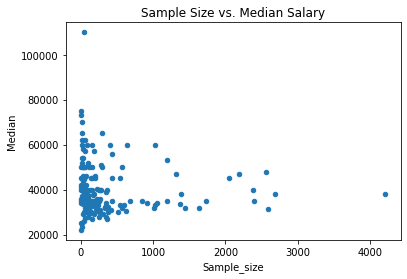

In [7]:
ax = grads.plot(x='Sample_size', y='Median', kind='scatter', title='Sample Size vs. Median Salary')

We see two clear outliers in the x-axis and y-axis: one data point with salary over 100,000 where the second highest value is below 80,000, and another datapoint with sample size over 4,000 where the second highest value is below 3,000. The majority of sample sizes are rather low which accounts for many of the higher salaries which we can observe as a vertical block line along the y axis with x-values very close to zero. For the rest we see that the salary ranges from around 25,000 to a little over 60,000. For larger sample sizes (ie. above 500) the salary ranges are in the neighborhood of 30,000 and 60,000. Further out, sample sizes of larger than 1,500 yield to salaries from about \\$30,000 to \\$50,000.

**Sample Size vs. Unemployment Rate**

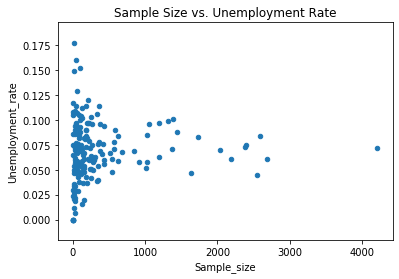

In [8]:
grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title='Sample Size vs. Unemployment Rate')

The scatter plot here is similar to the one above as many departments (ie. majors) have a low sample size which creates a vertical block and the larger the sample size gets the more unemployment rate approaches to the median. However, unlike the earlier plot, there are no clear outliers in the unemployment rate. We observe that once sample size increases above 500 the unemployment remains in the range of 5% and 10%.

**Full-Time vs. Median Salary**

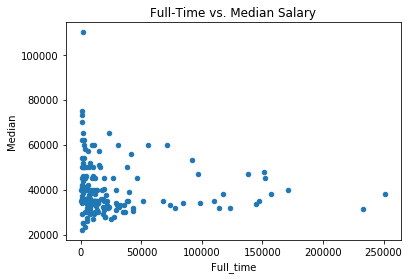

In [9]:
grads.plot(x='Full_time', y='Median', kind='scatter', title='Full-Time vs. Median Salary')

The scatter plot for full-time and median salary has similarities with the last two plots but the vertical 'block' is somewhat weaker and slightly more heterogeneous. Also the larger sample sizes don't 'wedge' or 'merge' towards median and have lower values. We can see this with an imaginary horizontal line stretching along the x-axis.

The outlier for salary is the one we already observed in the first plot. It appears that the more graduates a department has with full-time employee status, the more likely the salary ranges from \\$30,000 to \\$40,000. However, it would be a mistake to attribute this to full-time status, as it is likely that this is a function of the department rather than full-time status; in other words, the more graduates a department has the more likely their potential earnings is lower. It is also possible to interpret this similar to sample size, meaning the more students are sampled (within each department), the more 'realistic' the salaries become.

**Share of Females vs. Unemployment Rate**

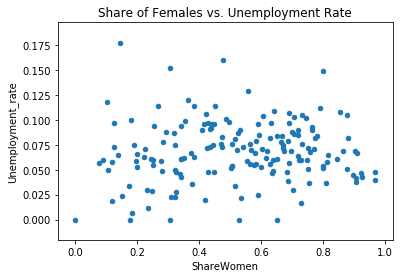

In [10]:
grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='Share of Females vs. Unemployment Rate')

This plot reveals whether female graduates have a higher or lower employment rates. Here we observe that there is no apparent relationship between female distribution within department and their employment rates. In other words, the departments where women constitute the majority are as likely to have their graduates employed as the departments where women are a minority. This challenges the commonly held view that women tend to attend departments that are less employable, whereas the plot shows that departments in which women hold an overwhelming majority have graduates that are roughly equally employable. In fact, the two departments with the highest share of female graduates at the right-most of the plot indicate relatively low unemployment levels of around 4-5%.

It is important to note that these observations do not reveal anything about salary or area of employment. In other words, although share of females in a department does not affect employability of graduates from that department, it is entirely possible that the graduates are paid much less (or more) and work in fields entirely related or unrelated to their field of study. To contextualize these observations, let's take a look at the compensation for male and female graduates.

**Total Number of Men and Women vs. Median Salary**

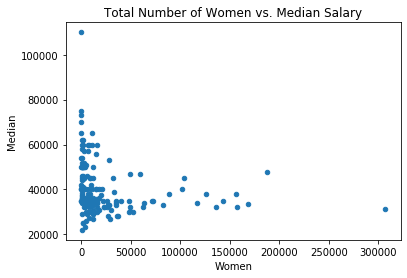

In [11]:
grads.plot(x='Women', y='Median', kind='scatter', title='Total Number of Women vs. Median Salary')

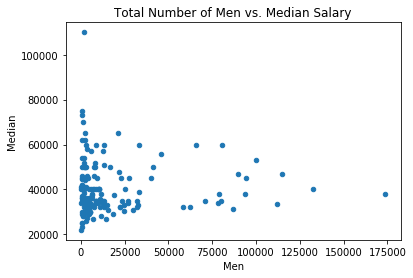

In [12]:
grads.plot(x='Men', y='Median', kind='scatter', title='Total Number of Men vs. Median Salary')

These plots don't reveal much as the total number of men and women graduated from each department isn't informative when we want to compare men and women. For example, it would be interesting to see how the department with graduates that have the *highest median salary* fare in terms of male/female ratio, which as we pointed out earlier is an outlier. When we look at this data point in both plots, we really don't understand the information and therefore, unable to interpret it, as it is presented in the plots. When we look at the right-most datapoints in both plots we see a department with over 300,000 female graduates with a salary a bit over \$30,000 and another department with around 175,000 make graduates with a salary closer to \$40,000. This implies that the departments with higher number of male graduates make more than the department with higher number of female graduates. However, when we look at the second highest total graduate numbers in both plots, this assumption is reversed. Here we see a deparment with a little less than 200,000 female graduates (second highest number) making close to \$50,000, whereas the second highly male populated department with a population of around 130,000 is making a little over \$40,000.

It is difficult to interpret plots with solely total number of graduates for each gender, especially since total numbers for males and females don't match and total numbers for any one gender don't reveal the proportion of males-to-females. In other words, if we take the second rightmost data point in the second plot (men vs. median salary), we see that the department with 130,000 male graduates made around \$40,000 after graduation, but this data point is also present in the female plot, where there were perhaps as many or more female graduates in that department, which is not reflected in the plot.

A better and clearer way to obtain the information we are interested in is to plot the share of females and median salary, which would enable us to see the relationship (or lack thereof).

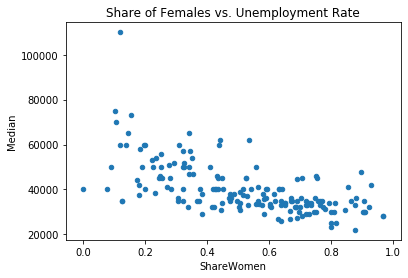

In [13]:
grads.plot(x='ShareWomen', y='Median', kind='scatter', title='Share of Females vs. Unemployment Rate')

Although not very strong, the graph displays a negative correlation between female distribution within departments (ie. majors) and the median salary after graduation. The weak downward slope indicates that the more a department has females in proportion to males, the lower the median salaries tend to get for graduates of that department. We will take a look at this issue in more detail in the last section of our analysis.

## Frequency Distributions Through Histograms

Now let's employ a different visual tool to examine some of the columns in our dataset starting with median salary.

Text(0.5, 1.0, 'Median Salary Distribution')

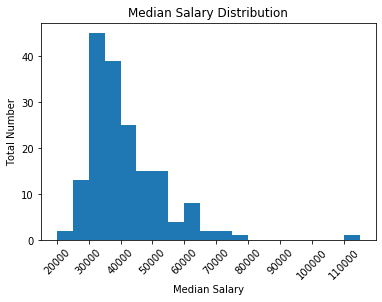

In [14]:
plt.hist(grads['Median'], bins=20, range=(20000,120000))
plt.xticks(range(0,120000,10000), rotation=45)
plt.xlim(15000,120000)
plt.xlabel('Median Salary')
plt.ylabel('Total Number')
plt.title('Median Salary Distribution')

Here we see a right-skewed distribution with a spike at 30,000 to 35,000 followed by a consistent decline. There is one outlier at 110,000, as we observed before.

Next let's take a look at full-time and part-time employment numbers.

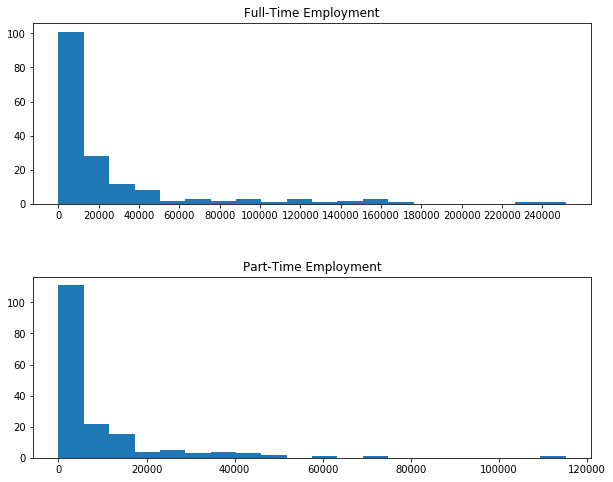

In [15]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.hist(grads['Full_time'], bins=20)
ax1.set_xticks(range(0,250000,20000))
ax1.set_title('Full-Time Employment')
ax2.hist(grads['Part_time'], bins=20)
ax2.set_xticks(range(0,140000,20000))
ax2.set_title('Part-Time Employment')
plt.subplots_adjust(hspace=0.4)


Most departments have below ten thousand graduates that are full-time or part-time. The histograms are scaled to accommodate total numbers below this figure, and as a result, the rest are not particularly easy to view. Now that we know the vast majority of departments have below ten thousand full-time and part-time graduates, we can focus on the remainder.

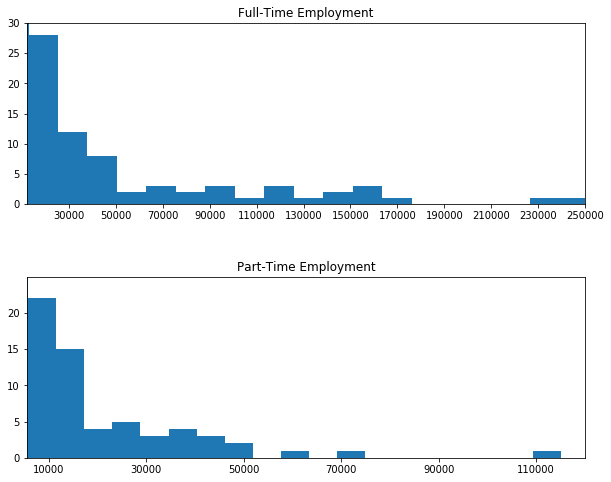

In [16]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.hist(grads['Full_time'], bins=20)
ax1.set_xticks(range(10000,270000,20000))
ax1.set_yticks(range(0, 40, 5))
ax1.set_title('Full-Time Employment')
ax1.set_xlim(12000,250000)
ax1.set_ylim(0,30)

ax2.hist(grads['Part_time'], bins=20)
ax2.set_xticks(range(10000,140000,20000))
ax2.set_yticks(range(0,25,5))
ax2.set_title('Part-Time Employment')
ax2.set_xlim(5500,120000)
ax2.set_ylim(0,25)
plt.subplots_adjust(hspace=0.4)

It is clear that once the total number of graduates exceeds 50,000 for full-time employees and 15,000 for part-time employees, the number of departments with higher numbers fall dramatically. This does not provide any meaningful insights. We can also compare the two variables using a line chart.

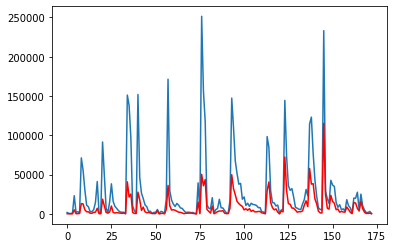

In [17]:
plt.plot(grads['Full_time'])
plt.plot(grads['Part_time'], c='red')

We see that the total number of part-time employees spikes along with the total number of full-time employees. This is not surprising as departments with more graduates have not only higher number of full-time employees but also higher number of part-time employees. However, we see different degrees of comparative spikes. For example, the full-time spike at just below 150 has a part-time spike, shown in red, much higher than others. Since we can't easily identify the departments/majors in this plot, we can limit our list to departments with large populations to examine the full-time and part-time relationship further by using bar plots.

## Employment Status and Unemployment Rates by Majors
We will start by subsetting our dataset to contain rows with graduate populations over 60,000.

In [18]:
high_pop = grads.loc[grads['Total'] > 60000, ['Major', 'Major_category','Full_time','Part_time']]
high_pop.info()
high_pop.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 8 to 149
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Major           30 non-null     object
 1   Major_category  30 non-null     object
 2   Full_time       30 non-null     int64 
 3   Part_time       30 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


,Major,Major_category,Full_time,Part_time
8,MECHANICAL ENGINEERING,Engineering,71298,13101
9,ELECTRICAL ENGINEERING,Engineering,55450,12695
17,GENERAL ENGINEERING,Engineering,41235,7199
20,COMPUTER SCIENCE,Computers & Mathematics,91485,18726
34,NURSING,Health,151191,40818


Next we will concatenate the columns representing the full-time and part-time values, which will enable constructing a bar plot with two variables.

Text(0.5, 1.0, 'Full-Time and Part-Time Numbers by Department')

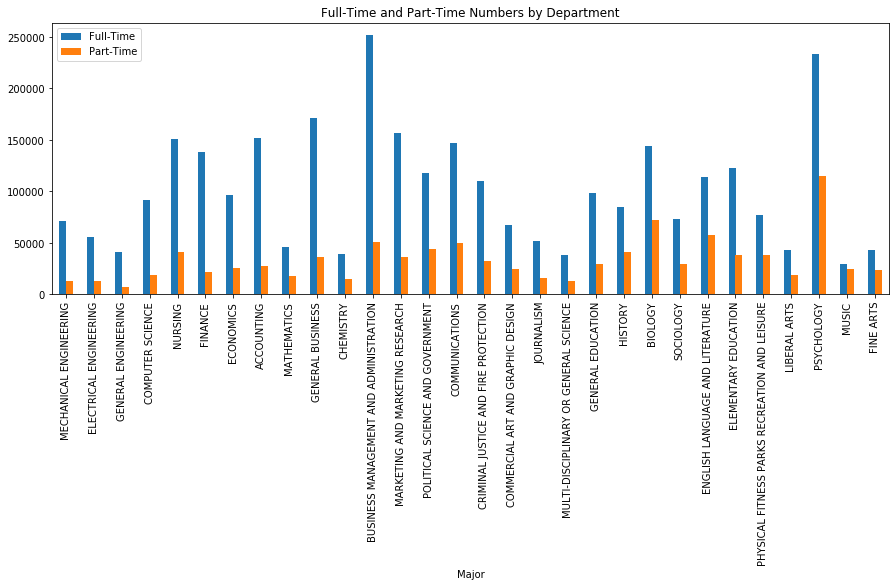

In [19]:
ft_pt = pd.DataFrame(np.c_[high_pop['Full_time'],high_pop['Part_time']],index=high_pop['Major'])
ft_pt.columns = ['Full-Time','Part-Time']
ft_pt.plot.bar(figsize=(15,5))
plt.xticks(rotation=90)
plt.title('Full-Time and Part-Time Numbers by Department')

Similar to the earlier plot, we see a strong parallel between full-time and part-time patterns, which as we mentioned is not surprising. However, there are a couple of observations we can make now that we have specific departments in the x-axis.

The largest gap appears to be in `Business Management and Administration` as graduates with this major don't seem to hold many part-time positions in comparison to full-time positions. This major seems to be distinc among all majors with large enrolment numbers in terms of its discrepancy between full-time and part-time numbers. On the other hand, we have quite a few majors where graduates with part-time status account for about half of graduates that are full-time employees. These include `History`, `Biology`, `English Language and Literature`, `Physical Fitness`, `Liberal Arts`, `Psychology`, `Music` and `Fine Arts`. Music majors appear to be unique among this group in that those with part-time employment almost match the numbers of those with full-time employment.

Finally, let's take a look at the unemployment rates.

Text(0.5, 1.0, 'Unemployment Rates')

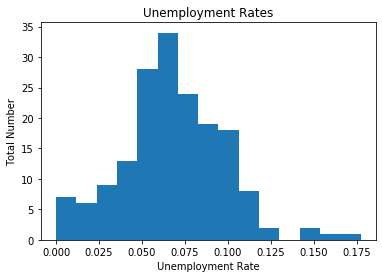

In [20]:
plt.hist(grads['Unemployment_rate'], bins=15)
plt.xlabel('Unemployment Rate')
plt.ylabel('Total Number')
plt.title('Unemployment Rates')

Here we see a slight positive skew with most departments having unemployment rates in the range between 5% and 10%. The peak appears to be around 6-7% with close to 35 departments having this level of unemployment. Let's take a look at departments with high and low unemployment numbers.

In [21]:
high_unemp = grads.loc[grads['Unemployment_rate'] > 0.10]
low_unemp = grads.loc[grads['Unemployment_rate'] < 0.025]
high_unemp.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
29,30,5402,PUBLIC POLICY,5978.0,2639.0,3339.0,Law & Public Policy,0.558548,55,4547,...,1306,2776,670,0.128426,50000,35000,70000,1550,1871,340
53,54,2101,COMPUTER PROGRAMMING AND DATA PROCESSING,4168.0,3046.0,1122.0,Computers & Mathematics,0.269194,43,3257,...,482,2453,419,0.113983,41300,20000,46000,2024,1033,263
55,56,2303,SCHOOL STUDENT COUNSELING,818.0,119.0,699.0,Education,0.854523,4,730,...,135,545,88,0.107579,41000,41000,43000,509,221,0


In [22]:
low_unemp.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,...,553,827,33,0.021167,62000,31500,109000,972,500,220
13,14,5008,MATERIALS SCIENCE,4279.0,2949.0,1330.0,Engineering,0.310820,22,3307,...,878,1967,78,0.023043,60000,39000,65000,2626,391,81
14,15,2409,ENGINEERING MECHANICS PHYSICS AND SCIENCE,4321.0,3526.0,795.0,Engineering,0.183985,30,3608,...,811,2004,23,0.006334,58000,25000,74000,2439,947,263


(0.05, 0.2)

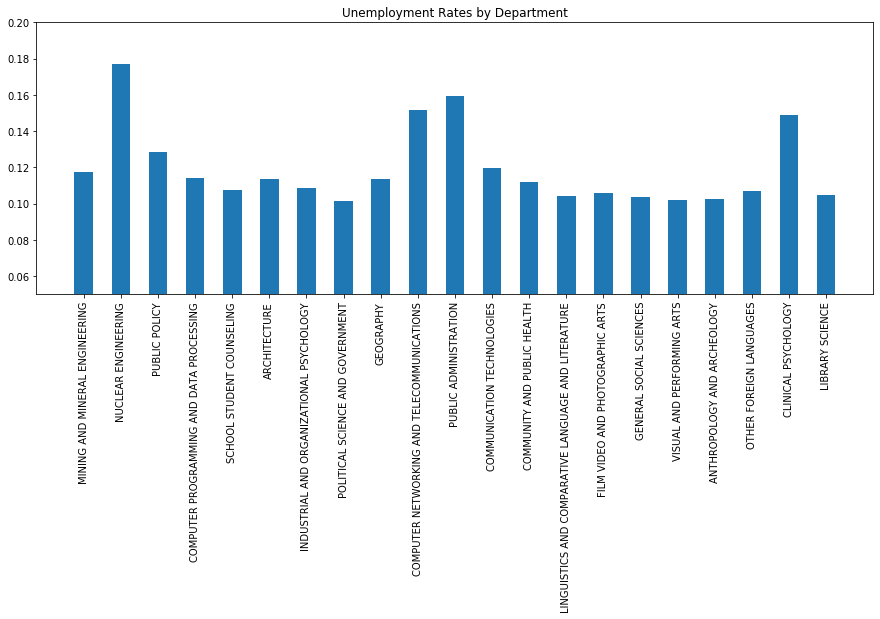

In [23]:
plt.figure(figsize=(15,5))
plt.bar(high_unemp['Major'], high_unemp['Unemployment_rate'], 0.5)
plt.xticks(rotation=90)
plt.title('Unemployment Rates by Department')
plt.ylim(0.05,0.2)

Text(0.5, 1.0, 'Unemployment Rates by Department')

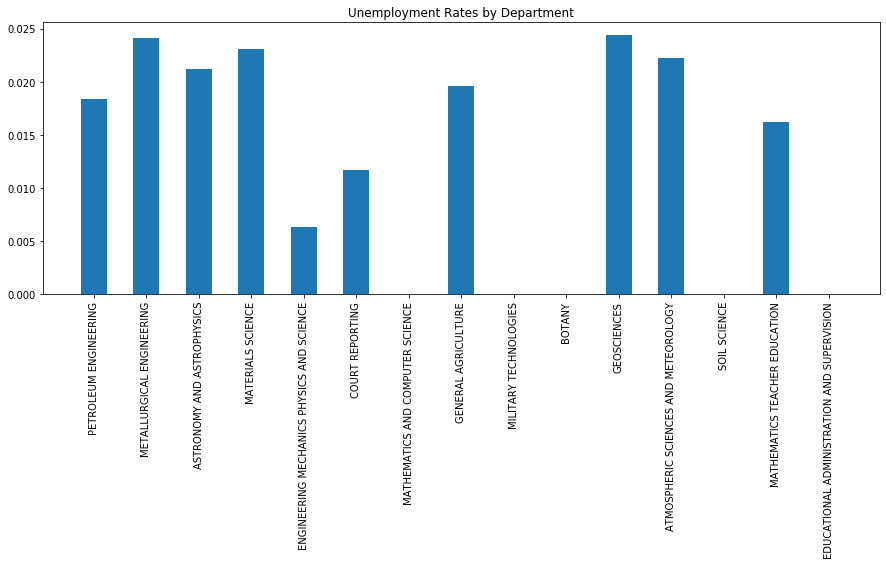

In [24]:
plt.figure(figsize=(15,5))
plt.bar(low_unemp['Major'], low_unemp['Unemployment_rate'], 0.5)
plt.xticks(rotation=90)
plt.title('Unemployment Rates by Department')

The first bar plot shows that `Nuclear Engineering` has the highest unemployment rates, followed by `Public Administration`, `Computer Networking and Telecommunications` and `Clinical Psychology`. The second bar plot reveals that there are 5 majors with zero unemployment for their graduates: `Mathematics and Computer Science`, `Military Technologies`, `Botany`, `Soil Science` and `Educational Administration and Supervision`. It is interesting that many of these majors are entirely unrealted to one another and would likely belong to different faculties. Let's take a look at the `major categories` column to see if our intuition is accurate.

In [25]:
zero_unemp = low_unemp.loc[low_unemp['Unemployment_rate'] == 0, ['Major', 'Major_category']]
zero_unemp

,Major,Major_category
52,MATHEMATICS AND COMPUTER SCIENCE,Computers & Mathematics
73,MILITARY TECHNOLOGIES,Industrial Arts & Consumer Services
83,BOTANY,Biology & Life Science
112,SOIL SCIENCE,Agriculture & Natural Resources
120,EDUCATIONAL ADMINISTRATION AND SUPERVISION,Education


It is in fact true that the 'zero unemployment' majors come from different categories (faculties), although many seem to be part of the STEM fields that are typically considered to provide best employment opportunities post graduation.

Lastly, let's look at the majors that have the highest and lowest salaries and the share of females for these majors.

In [26]:
highest_salaries = grads[grads['Median'] >= 60000]
highest_salaries.sort_values(by='Median')
highest_salaries.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [27]:
lowest_salaries = grads[grads['Median'] <= 28000]
lowest_salaries = lowest_salaries.sort_values(by='Median', ascending=True)
lowest_salaries.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743


Text(0.5, 1.0, 'Highest Salaries vs. Female Distribution')

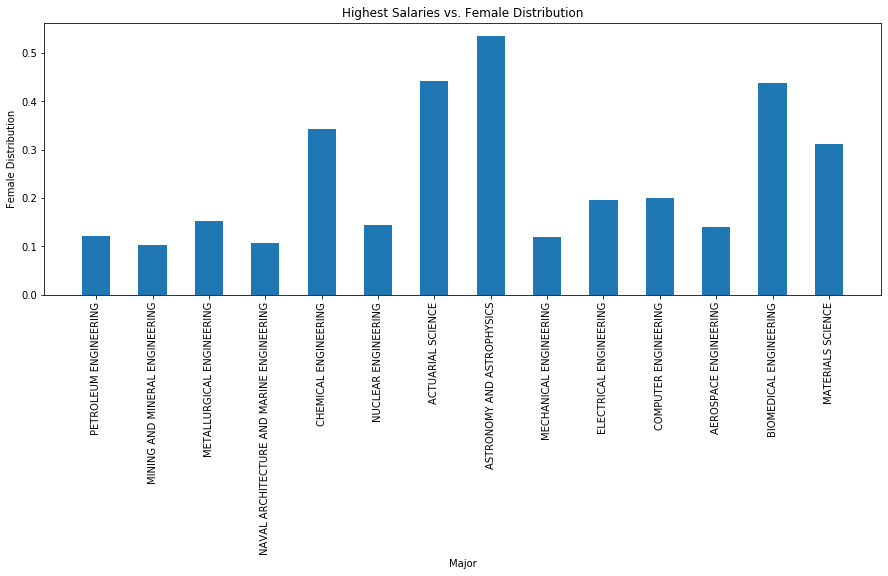

In [28]:
plt.figure(figsize=(15,5))
plt.bar(highest_salaries['Major'], highest_salaries['ShareWomen'], 0.5)
plt.xticks(rotation=90)
plt.xlabel('Major')
plt.ylabel('Female Distribution')
plt.title('Highest Salaries vs. Female Distribution')

As we can see from this plot, among the majors with highest salaries there is only one major where females represent around half of the student population and the rest of the majors consist of more males than females. In fact, none of the top four majors comprise of more than 15% females. The plot demonstrates how majors which yield to highest salaries are dominated by men, where only five of the fourteen top majors have a female ratio of above 20%.

Now let's take a look at the other end of the spectrum, majors with lowest median salaries.

Text(0.5, 1.0, 'Lowest Salaries vs. Female Distribution')

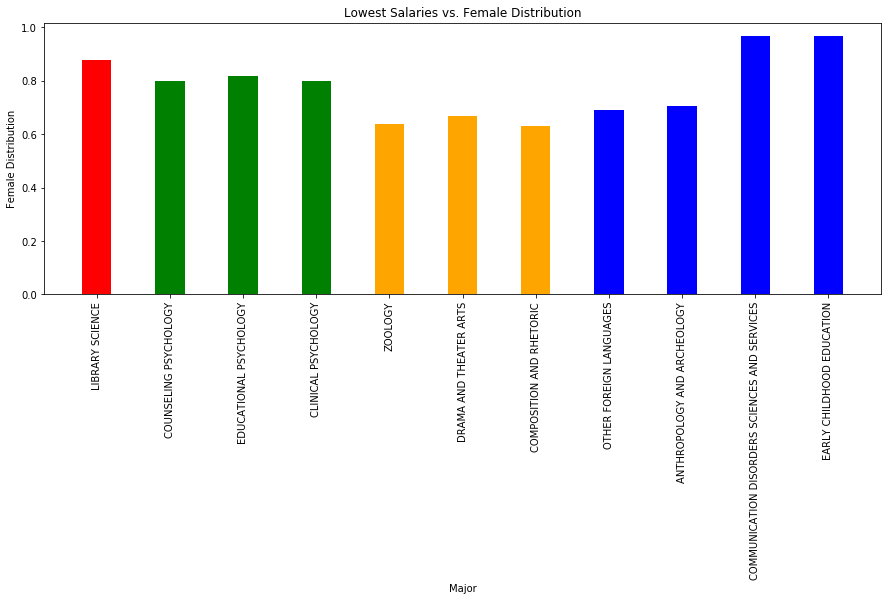

In [29]:
plt.figure(figsize=(15,5))
color_pattern = ['red','green','green','green','orange','orange','orange','blue','blue','blue','blue']
plt.bar(lowest_salaries['Major'], lowest_salaries['ShareWomen'], 0.4, color=color_pattern)
plt.xticks(rotation=90)
plt.xlabel('Major')
plt.ylabel('Female Distribution')
plt.title('Lowest Salaries vs. Female Distribution')

Unlike the earlier bar plot, here we see an overwhelming majority of females with at least a 60% representation among the majors with lowest median salaries. Interestingly, the seven lowest paying majors (seven leftmost bars) show a falling trend, where majors can be lumped into three groups as Library Science (colored in red), three Pyschology majors (colored in green) and the remaining three majors (colored in orange), where each group shows a clear decline compared to the earlier group. In other words, the general pattern we observe for the bottom seven majors in median salary is an inverse relationship between post-graduation salary and female attendance rates.

## Conclusion

In this project we first examined the distribution of men and women among majors and determined the majors with maximum and minimum attendance for each gender (Pyschology and Military Technologies for women, and Business Management/Administration and School Student Counseling for men, respectively). Then we employed scatter plots to investigate relationships between various measures such as sample size, median salary, employment status (full-time/part-time), unemployment rate, and gender distributions. In doing so, we observed that there is no strong correlation between sample sizes and various parameters, although we observed that the higher the sample size for a major is the more likely it will represent a more 'realistic' median salary. In this portion of our analysis we also discovered that the majors in which women held the majority were as likely to find employment as majors in which they were the minority. We presented this observation with the caveat that it does not reveal any information about salary or area of employment, so we continued with further exploration of these issues. After plotting female distribution for departments against median salaries, we found a weak negative correlation between these two variables, implying that the more a major has females in proportion to males, the lower its graduates tend to receive in earnings.

Next, we explored employment status (ie. full-time vs. part-time) utilizing histograms and bar charts. After observing a general matching trend between full-time and part-time total numbers for each department, along with some notable departures from this trend, we decided to focus our attention on departments with large populations in order to 1) make more reliable observations with larger samples sizes, and 2) obtain specific departments/majors which is not viable without limiting the scope of data containing 173 majors. This approach revealed some interesting observations. For example, we found out that the largest gap between full-time and part-time status presented itself in `Business Management and Administration`, meaning that graduates who find employment with this major tend to hold substantially higher full-time positions in comparison to part-time positions. On the other end of the spectrum we noted that `History`, `Biology`, `English Language and Literature`, `Physical Fitness`, `Liberal Arts`, `Psychology`, `Music` and `Fine Arts` all had relatively high proportion of graduates with part-time employment status. Among this group we observed that music graduates held almost as many part-time jobs as full-time positions.

In the last portion of our analysis we examined two topics: unemployment rates by major and median salaries by female distribution. Here we determined majors with the highest unemployment rates (`Nuclear Engineering`, `Public Administration`, `Computer Networking and Telecommunications` and `Clinical Psychology`), as well as lowest unemployment rates (`Mathematics and Computer Science`, `Military Technologies`, `Botany`, `Soil Science` and `Education Administration and Supervision`). We also noted that the majors with lowest unemployment rates are relatively unrelated to each other, as can be observed by each one of them belonging to a different major category (ie. faculty). Finally, using the information we obtained earlier regarding highest/lowest median salaries by departments, we inspected how female distributions fared within that framework. This led to an interesting and unequivocal observation that the majors that women tend to attend had the lowest earning prospects and the majors that women tend not to attend had the highest earning prospects. The disparity was very prominent as the top four departments in salary prospects all had less than 20% female graduates and the bottom four departments in terms of salary prospects had at least 80% female representation in each major. The observation is striking and an examination of underlying reasons behind it is beyond the scope of this study, but they are likely a combination of more complex issues such as gender bias, maternity leaves and gender roles with regards to employment.